#Project Hacker News

##Cel projektu:

Porównanie rodzajów/typów postów na internetowym forum **Hacker News**.

W projecie przeanalizowano 2 typy postów, ich przedrodtki to:

`Ask HN ` - posty w których użytkownicy pytają o konkretne zagadfnienia.

`Show HN ` - posty w których użytkownicy dzielą się ze sobą projektami.

Postanowiono odpowiedzieć na pytania:


*   Czy posty z kategorii `Ask HN ` i `Show HN ` są średnio częściej komentowane niż pozostałe?
*   Czy posty utworzone w konkretnym przedziale czasu były średnio częściej komentowane niż w innym czasie?

#### Wprowadzenie

Wczytanie i krótki opis danych. (Posłużono się metodami z poprzedniego projektu Apps)

In [ ]:
!wget https://raw.githubusercontent.com/VictorOmondi1997/ExploringHackerNewsPosts/master/hacker_news.csv -O hn_wget.csv

from csv import reader
hn = list(reader(open('hn_wget.csv')))
hn_header = hn[0]
hn = hn[1:]

def explore_data_pandas(dane1, start, end):
  print(f'Liczba wierszy: {len(dane1)}')
  print(f'Liczba kolumn: {len(dane1[0])}')
  import pandas
  df = pandas.DataFrame(dane1[start:end])
  display(df)

--2022-12-06 13:15:30--  https://raw.githubusercontent.com/VictorOmondi1997/ExploringHackerNewsPosts/master/hacker_news.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.111.133, 185.199.109.133, 185.199.108.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.111.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 3104968 (3.0M) [text/plain]
Saving to: ‘hn_wget.csv’

hn_wget.csv         100%[===================>]   2.96M  --.-KB/s    in 0.02s   

2022-12-06 13:15:30 (119 MB/s) - ‘hn_wget.csv’ saved [3104968/3104968]



Zbiór danych posiada 20100 rekordów oraz 7 kolumn, które kolejno oznaczają:

0.   `id` - unikatowy numer artykułu
1.   `title` - tytuł artykułu
2.   `url` - link do artykuły (jezeli jest)
3.   `num_points` - liczbę punktów jakie zdobył danyc artykuł, wyliczoną z różnicy punktów dodatnich i ujemnych.
4.   `num_comments` - liczba komentarzy
5.   `author` - nick autora artykułu
6.   `created_at` - data publikacji artykułu

In [ ]:
explore_data_pandas(hn, 0, 5)

Liczba wierszy: 20100
Liczba kolumn: 7


,0,1,2,3,4,5,6
0,12224879,Interactive Dynamic Video,http://www.interactivedynamicvideo.com/,386,52,ne0phyte,8/4/2016 11:52
1,10975351,How to Use Open Source and Shut the Fuck Up at...,http://hueniverse.com/2016/01/26/how-to-use-op...,39,10,josep2,1/26/2016 19:30
2,11964716,Florida DJs May Face Felony for April Fools' W...,http://www.thewire.com/entertainment/2013/04/f...,2,1,vezycash,6/23/2016 22:20
3,11919867,Technology ventures: From Idea to Enterprise,https://www.amazon.com/Technology-Ventures-Ent...,3,1,hswarna,6/17/2016 0:01
4,10301696,Note by Note: The Making of Steinway L1037 (2007),http://www.nytimes.com/2007/11/07/movies/07ste...,8,2,walterbell,9/30/2015 4:12


#### Wyciąganie artykułów w kategorii `Ask HN` i `Show HN`

Użyto metody startswith, sprawdzającej czy np. string "ania ma kota" zaczyna się od "ania"

`.lower` zamienia string na małe litery, aby uniknąć pominięcia tytułów napisanych wielką literą

In [ ]:
#odrębne listy na każdy z wyciąganych rodzajów postów
ask_posts = []
show_posts =[]
other_posts = []

for post in hn:
    title = post[1] # tytuł jest na indexie 1
    if title.lower().startswith("ask hn"):
        ask_posts.append(post)
    elif title.lower().startswith("show hn"):
        show_posts.append(post)
    else:
        other_posts.append(post)

print(len(ask_posts))
print(len(show_posts))
print(len(other_posts))

1744
1162
17194


#### Obliczanie średniej ilości komentarzy pod postami Ask HN oraz Show HN

In [ ]:
explore_data_pandas(ask_posts, 0, 5)

Liczba wierszy: 1744
Liczba kolumn: 7


,0,1,2,3,4,5,6
0,12296411,Ask HN: How to improve my personal website?,,2,6,ahmedbaracat,8/16/2016 9:55
1,10610020,Ask HN: Am I the only one outraged by Twitter ...,,28,29,tkfx,11/22/2015 13:43
2,11610310,Ask HN: Aby recent changes to CSS that broke m...,,1,1,polskibus,5/2/2016 10:14
3,12210105,Ask HN: Looking for Employee #3 How do I do it?,,1,3,sph130,8/2/2016 14:20
4,10394168,Ask HN: Someone offered to buy my browser exte...,,28,17,roykolak,10/15/2015 16:38


Na początku stworzono zmienną `total_ask_comments` równą `0`, do której pętla `for` w każdej iteracji dodaje liczbę (zamienioną na typ `intiger`) z 4 indexu odpowiadającą liczbie komentarzy. W ten sposób uzyskano całkowitą liczbę komentarzy w postach Ask HN.

`avg_ask_comments` czyli średnią ilość komentarzy na post, oblicozno dzieląc `total_ask_comments` przez całą długość zbioru `ask_post`

In [ ]:
total_ask_comments = 0

for post in ask_posts:
    total_ask_comments += int(post[4])

avg_ask_comments = total_ask_comments / len(ask_posts)
print(avg_ask_comments)

14.038417431192661


Analogicznie postąpiono przy postach Show HN

In [ ]:
total_show_comments = 0

for post in show_posts:
    total_show_comments += int(post[4])

avg_show_comments = total_show_comments / len(show_posts)
print(avg_show_comments)

10.31669535283993


Post Ask HN zdobywa średnio w przybliżeniu 14 komentarzy, podczas gdy post Show HN 10. Wynika to najprawdopodobniej z tego że posty Ask HN to pytania a komentarze to odpowiedzi.

#### Wyszukiwanie ilości postów Ask HN i ich komentarzy na podstawie godziny dodania.
Aby dowieedzieć się czy posty Ask HN są częściej komentowane w konkretnym czasie, obliczono ile postów jest publikowanych oraz to ile zdobywają komentarzy w danych godzinach. Następnie obliczono średnią ilość komentarzy w danej godzinie.

Do obliczeń zaimportowano moduł datetime. Utworzono pustą listę do przechowywania list z której każda posaida czas dodania postu i liczbę komentarzy (w typie intiger).

Następnie utworzono 2 słowniki, `commentss_by_hour` i `counts_by_hour`. `date_format` ustawiono tak jak jest w zbiorze danych. W pętli `for` iterowano po każdym wierszu, przypisano zmienne date i coment oraz time (funkcją `strptime ` przekonwertowano string na obiekt `datetime`. `strftime` działa odwrotnie, użyto go żeby zaznaczyć jedynie godzine z obiektu `datetime`.

Kolejno utworzono wyrażenie warunkowe, w którym przy każdej iteracji do słownika `comments_by_hour` zostaje dodana liczba komentarzy. Zostaje również sprawdzone czy dana godzina jest już  w słowniku `counts_by_hour`, jeżeli tak to dodaje do istniejących. Jeżeli natomiast nie ma czasu (czyli pełnej godziny) w słownikach, zostaje w nich utworzony dany klucz.

In [ ]:
import datetime as dt

result_list = []

for post in ask_posts:
    result_list.append(
        [post[6], int(post[4])]
    )

comments_by_hour = {}
counts_by_hour = {}
date_format = "%m/%d/%Y %H:%M"

for each_row in result_list:
    date = each_row[0]
    comment = each_row[1]
    time = dt.datetime.strptime(date, date_format).strftime("%H")
    if time in counts_by_hour:
        comments_by_hour[time] += comment
        counts_by_hour[time] += 1
    else:
        comments_by_hour[time] = comment
        counts_by_hour[time] = 1

comments_by_hour
#counts_by_hour

{'09': 251,
 '13': 1253,
 '10': 793,
 '14': 1416,
 '16': 1814,
 '23': 543,
 '12': 687,
 '17': 1146,
 '15': 4477,
 '21': 1745,
 '20': 1722,
 '02': 1381,
 '18': 1439,
 '03': 421,
 '05': 464,
 '19': 1188,
 '01': 683,
 '22': 479,
 '08': 492,
 '04': 337,
 '00': 447,
 '06': 397,
 '07': 267,
 '11': 641}

#### Obliczanie średniej ilości komentarzy postów Ask HN z uwagi na godzine dodania

Aby obliczyć średnią ilość kometarzy w konkretnych godzinach, posłużono się utworzonymi wyrzej słownikami `commentss_by_hour` i `counts_by_hour`.

Utworzono pustą listę a następnie iterowano po każdym elemecie ze słownika comments_by_hour, co listy dodawano klucz (czyli godzine) i średnia liczbę komentarzy obliczoną z całkowitej liczby komentarzy podzielonej przez liczbę postów.

In [ ]:
avg_by_hour = []

for hr in comments_by_hour:
    avg_by_hour.append([(hr), comments_by_hour[hr] / counts_by_hour[hr]])

avg_by_hour

[['09', 5.5777777777777775],
 ['13', 14.741176470588234],
 ['10', 13.440677966101696],
 ['14', 13.233644859813085],
 ['16', 16.796296296296298],
 ['23', 7.985294117647059],
 ['12', 9.41095890410959],
 ['17', 11.46],
 ['15', 38.5948275862069],
 ['21', 16.009174311926607],
 ['20', 21.525],
 ['02', 23.810344827586206],
 ['18', 13.20183486238532],
 ['03', 7.796296296296297],
 ['05', 10.08695652173913],
 ['19', 10.8],
 ['01', 11.383333333333333],
 ['22', 6.746478873239437],
 ['08', 10.25],
 ['04', 7.170212765957447],
 ['00', 8.127272727272727],
 ['06', 9.022727272727273],
 ['07', 7.852941176470588],
 ['11', 11.051724137931034]]

Chcąc uzzyskać listę w której średnia liczba komentarzy będzie maleć, utworzono pustą liste `swap_avg_by_hour` w której prostą pętlą zastosowano zamiane argumentów. Nastepnie fukcją `sorted` posortowano malejąco (`reverse = True`)


In [ ]:
swap_avg_by_hour = []

for row in avg_by_hour:
    swap_avg_by_hour.append([row[1], row[0]])

print(swap_avg_by_hour)

sorted_swap = sorted(swap_avg_by_hour, reverse=True)

sorted_swap

[[5.5777777777777775, '09'], [14.741176470588234, '13'], [13.440677966101696, '10'], [13.233644859813085, '14'], [16.796296296296298, '16'], [7.985294117647059, '23'], [9.41095890410959, '12'], [11.46, '17'], [38.5948275862069, '15'], [16.009174311926607, '21'], [21.525, '20'], [23.810344827586206, '02'], [13.20183486238532, '18'], [7.796296296296297, '03'], [10.08695652173913, '05'], [10.8, '19'], [11.383333333333333, '01'], [6.746478873239437, '22'], [10.25, '08'], [7.170212765957447, '04'], [8.127272727272727, '00'], [9.022727272727273, '06'], [7.852941176470588, '07'], [11.051724137931034, '11']]


[[38.5948275862069, '15'],
 [23.810344827586206, '02'],
 [21.525, '20'],
 [16.796296296296298, '16'],
 [16.009174311926607, '21'],
 [14.741176470588234, '13'],
 [13.440677966101696, '10'],
 [13.233644859813085, '14'],
 [13.20183486238532, '18'],
 [11.46, '17'],
 [11.383333333333333, '01'],
 [11.051724137931034, '11'],
 [10.8, '19'],
 [10.25, '08'],
 [10.08695652173913, '05'],
 [9.41095890410959, '12'],
 [9.022727272727273, '06'],
 [8.127272727272727, '00'],
 [7.985294117647059, '23'],
 [7.852941176470588, '07'],
 [7.796296296296297, '03'],
 [7.170212765957447, '04'],
 [6.746478873239437, '22'],
 [5.5777777777777775, '09']]

Ponownie zastosowano funkcje `strptime` i `strftime` do wyświetlenia odpowiedzi której szukano.

In [ ]:
print("Top 5 godzin w których komentowano posty 'Ask HN' ")
for avg, hr in sorted_swap[:5]:
    print(
        "{}: {:.2f} średnio komentarzy na post".format(
            dt.datetime.strptime(hr, "%H").strftime("%H:%M"),avg
        )
    )



Top 5 godzin w których komentowano posty 'Ask HN' 
15:00: 38.59 średnio komentarzy na post
02:00: 23.81 średnio komentarzy na post
20:00: 21.52 średnio komentarzy na post
16:00: 16.80 średnio komentarzy na post
21:00: 16.01 średnio komentarzy na post


Do zwizualizowania różnic w rozkładzie ilości komentarzy w dobie, użyto biblioteki `matplotlib`.

<BarContainer object of 24 artists>

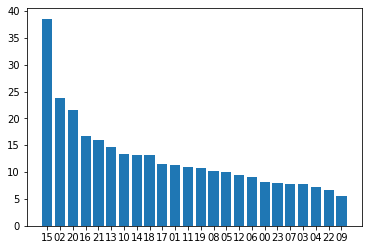

In [ ]:
from matplotlib import pyplot as plt

xs, ys = [*zip(*sorted_swap)]
plt.bar(ys, xs)